# Notebook 7: On Decision Trees, Random Forest and Gradient Boosting Methods for Regression

We now use the following as regressors: 

1. Decision Trees  
2. Ensemble Models   
   2.1 Random Forest    
   2.2 Gradient Boosting Method (Gradient Boosted Regression Trees) 

##  Here is a quick summary of when to use which model 

• **Nearest neighbors**: for small datasets, good as a baseline, easy to explain.   
• **Linear models**: Go-to as a first algorithm to try, good for very large datasets, good
for very high-dimensional data.  
• **Naive Bayes**: Only for classification. Even faster than linear models, good for very
large, high-dimensional data. Often less accurate than linear models.  (Not yet discussed)  
• **Decision trees**: Very fast, don’t need scaling of the data, can be visualized and
easily explained.  
• **Random forests**: Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high dimensional sparse data.  
• **Gradient Boosted Decision Trees**: 
Slower to train but often slightly more accurate than random forest. Need more parameter tuning than random forest.    
• **Support Vector Machines**: Powerful for medium-sized datasets of features with similar meaning. Needs scaling of data, sensitive to parameters.   
• **Neural Networks**: Can build very complex models, in particular for large datasets.
Sensitive to scaling of the data, and to the choice of parameters. Large models
need a long time to train.  (Not yet discussed)    


When working with a new dataset, it is in general a good idea to start with a simple model, such as a linear model, naive Bayes (to be discussed in ML2) or nearest neighbors and see how far you can get. After understanding more about the data, you can consider moving to an algorithm that can build more complex models, such as random forests, gradient boosting, SVMs or neural networks (to be discussed in ML2).



#### The above summary is based on the following references:

Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017;

Python Machine Learning, Sebastian Raschka and Vahid Mirjalili;

#### All examples below are created by:
Christopher Monterola



In [1]:
# !pip install mglearn

# Example 1. Interpolating a Periodic Signal


In [2]:
from sklearn.neighbors import KNeighborsRegressor
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'Target')

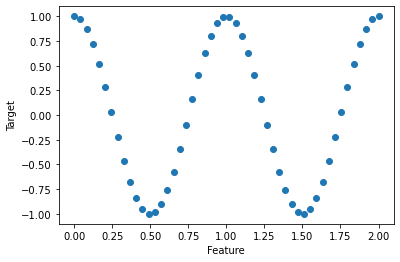

In [3]:
X = np.linspace(0.0, 2.0)
y = np.cos(2 * np.pi * X)
plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from numpy import array
XX=np.reshape(X, (len(X),-1))  #Reshape the list to array

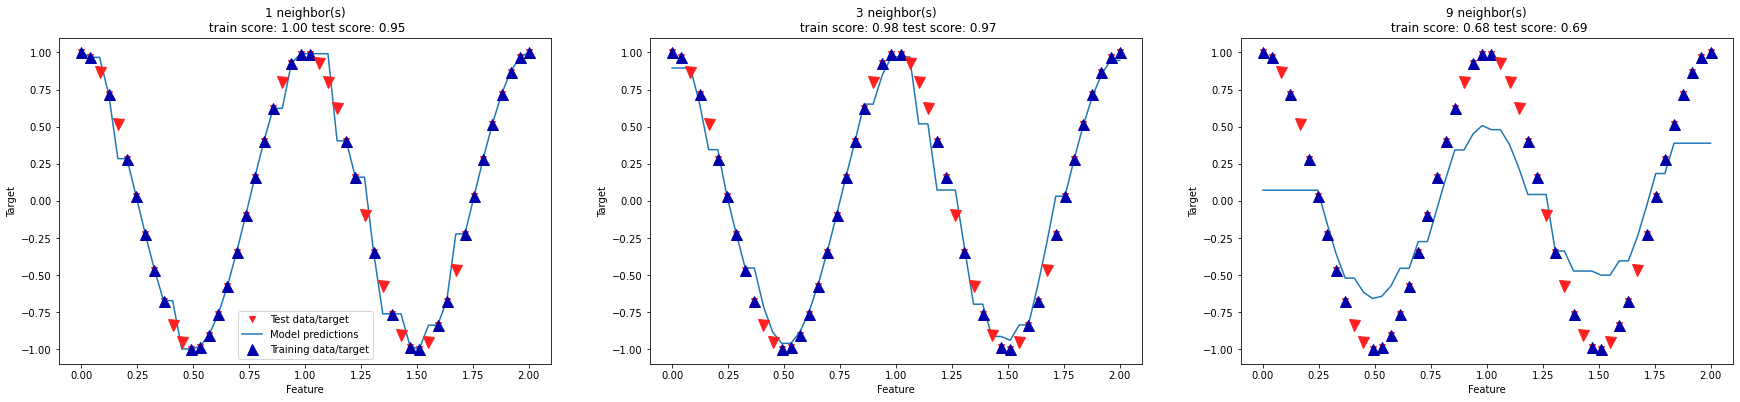

In [5]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) 
line = np.linspace(0, 2, 50).reshape(50, -1) # create 50 data points, evenly spaced between 0 and 2
#plt.suptitle("nearest_neighbor_regression")
import pylab as plot
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)
for n_neighbors, ax in zip([1, 3, 9], axes): # make predictions using 1, 3 or 9 neighbors\
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

# Let's consider a Decision Tree Regressor

Instead of Gini impurity or Entropy, standard deviation is used in creating a tree. You choose the tree with the largest change in standard deviation. Homework, read and understand the illustrative example here: http://saedsayad.com/decision_tree_reg.htm

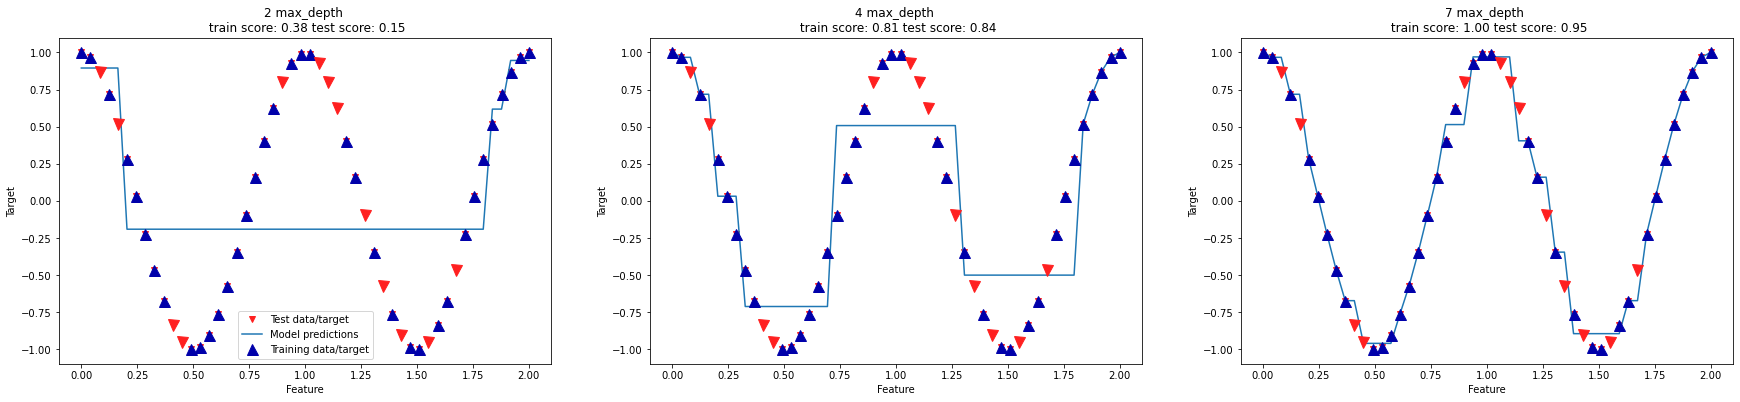

In [6]:
from sklearn.tree import DecisionTreeRegressor


X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) 
line = np.linspace(0, 2, 50).reshape(50, -1) # create 50 data points, evenly spaced between 0 and 2
#plt.suptitle("nearest_neighbor_regression")
import pylab as plot
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)
for depth, ax in zip([2, 4, 7], axes): # make predictions using 1, 3 or 9 neighbors\
    reg = DecisionTreeRegressor(random_state=0, max_depth=depth)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} max_depth \n train score: {:.2f} test score: {:.2f}".format(depth,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [7]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,50,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    maxdepth_settings = range(1, 15) # try n_neighbors from 1 to 10

    for depth in maxdepth_settings:   
        reg = DecisionTreeRegressor(random_state=0, max_depth=depth) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Average Test Set Achieved = 0.912649
Max_Depth = 12


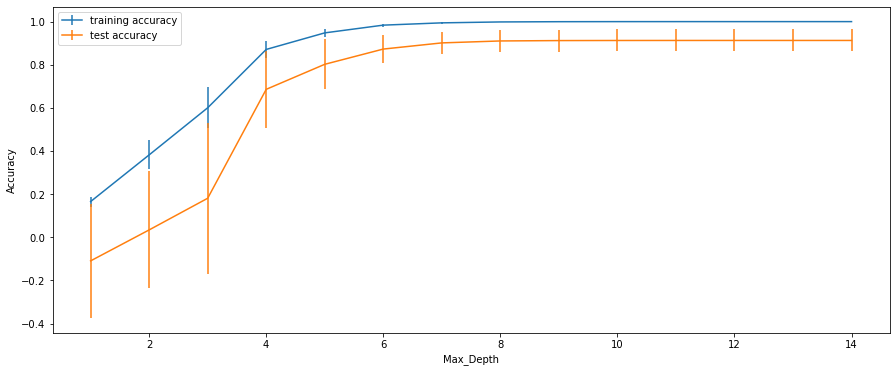

In [8]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(maxdepth_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy")
plt.errorbar(maxdepth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_Depth")
plt.legend()
bestdepth=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Max_Depth = %d" %bestdepth )

# Let's consider a Random Forest Regressor

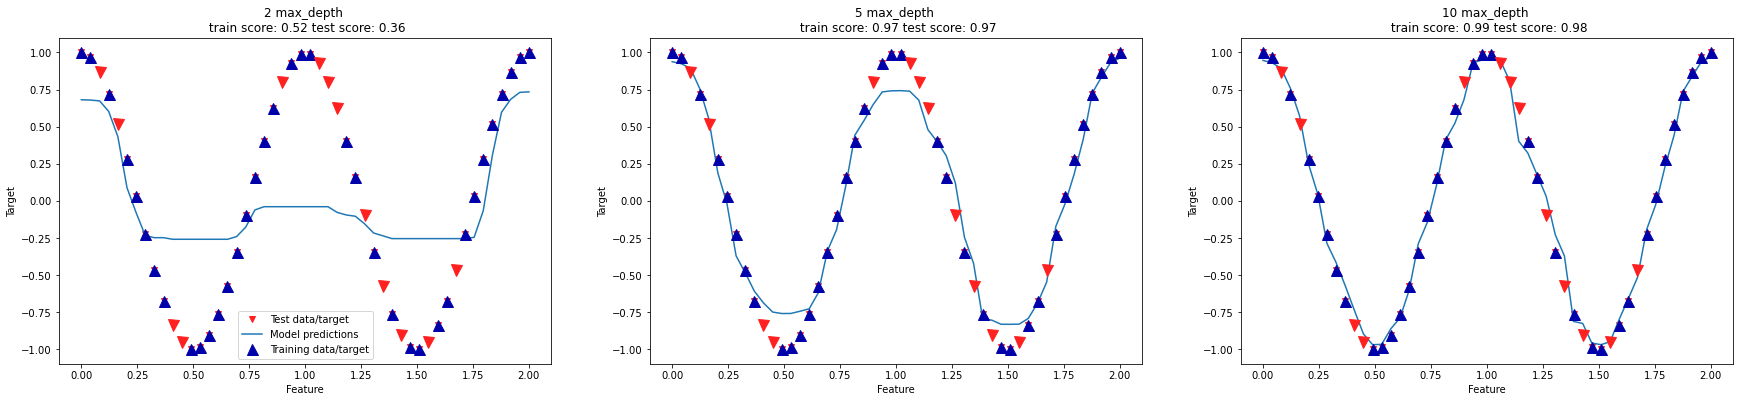

In [9]:
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) 
line = np.linspace(0, 2, 50).reshape(50, -1) # create 50 data points, evenly spaced between 0 and 2
#plt.suptitle("nearest_neighbor_regression")
import pylab as plot
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)
for estimator, ax in zip([2, 5, 10], axes): # make predictions using 1, 3 or 9 neighbors\
    reg = RandomForestRegressor(random_state=0, max_depth=estimator)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} max_depth \n train score: {:.2f} test score: {:.2f}".format(estimator,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

for seedN in range(1,20,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    max_depth_settings = range(1, 10) # try n_neighbors from 1 to 50

    for depth in max_depth_settings:   
        forest = RandomForestRegressor(max_depth=depth, random_state=0, n_estimators=100)
        forest.fit(X_train, y_train)
        training_accuracy.append(forest.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(forest.score(X_test, y_test))   # record generalization accuracy
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Average Test Set Achieved = 0.969443
Best max_depth = 9


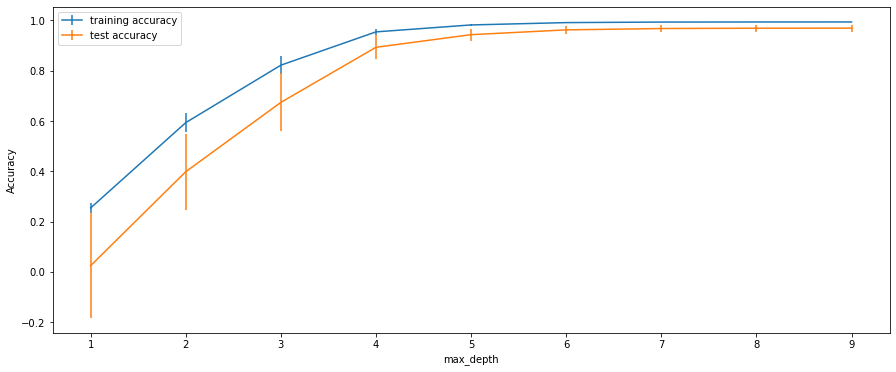

In [11]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(max_depth_settings, lahat_training.mean(axis=1),
              yerr=lahat_training.std(axis=1), label="training accuracy")
plt.errorbar(max_depth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
best_nestimator=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best max_depth = %d" %best_nestimator )

# Let's consider a GBM Regressor

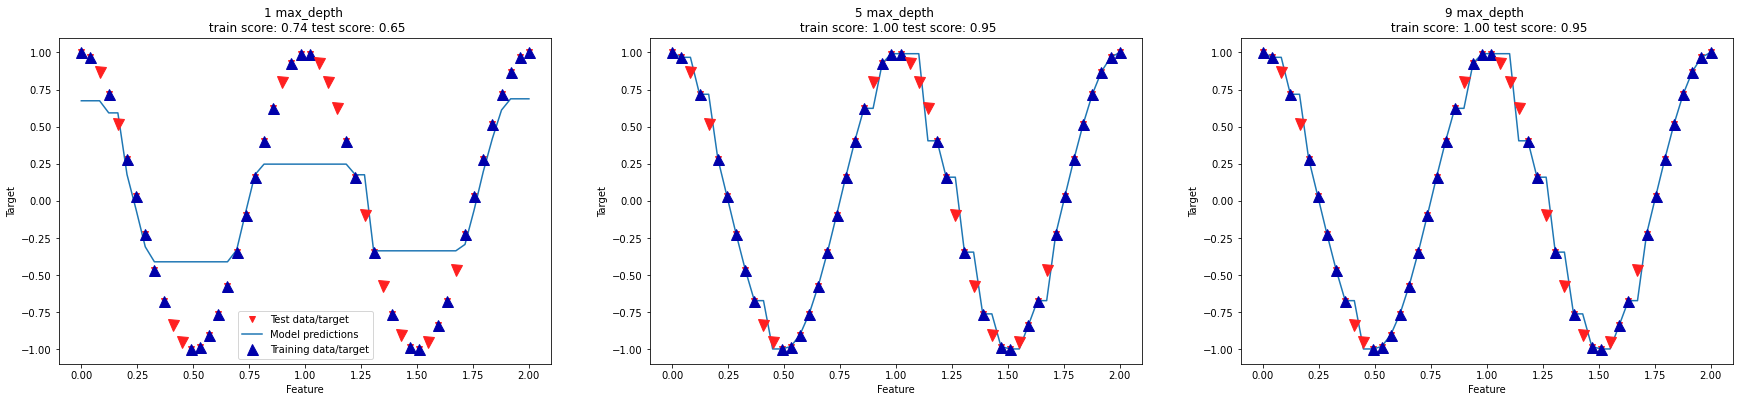

In [12]:
from sklearn.ensemble import GradientBoostingRegressor


X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) 
line = np.linspace(0, 2, 50).reshape(50, -1) # create 50 data points, evenly spaced between 0 and 2
#plt.suptitle("nearest_neighbor_regression")
import pylab as plot
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)
for depth, ax in zip([1, 5, 9], axes): # make predictions using 1, 3 or 9 neighbors\
    reg = GradientBoostingRegressor(random_state=0, max_depth=depth, learning_rate=0.1)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} max_depth \n train score: {:.2f} test score: {:.2f}".format(depth,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

for seedN in range(1,20,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    depth_settings = range(1, 15) # try n_neighbors from 1 to 50

    for depth in depth_settings:   
        forest = GradientBoostingRegressor(max_depth=depth, random_state=0, learning_rate=0.1)
        forest.fit(X_train, y_train)
        training_accuracy.append(forest.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(forest.score(X_test, y_test))   # record generalization accuracy
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Average Test Set Achieved = 0.922345
Best max_depth = 4


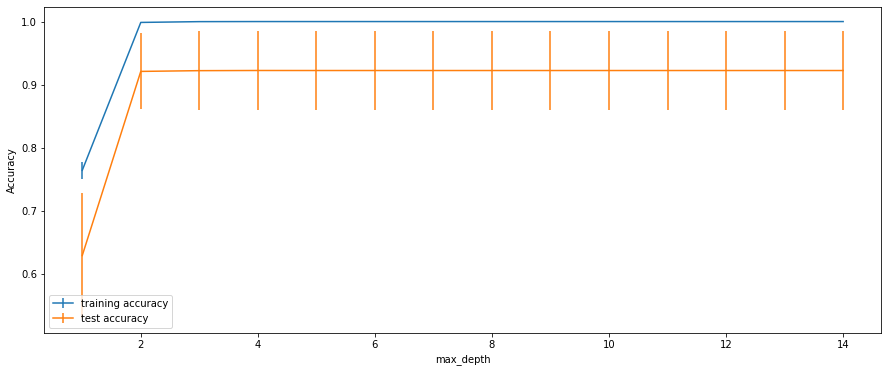

In [14]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(depth_settings, lahat_training.mean(axis=1),
              yerr=lahat_training.std(axis=1), label="training accuracy")
plt.errorbar(depth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
best_nestimator=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best max_depth = %d" %best_nestimator )

### Learning Teams
Discuss the above examples.

# Example 2: Comparison with arbitrary signal type

<Figure size 432x288 with 0 Axes>

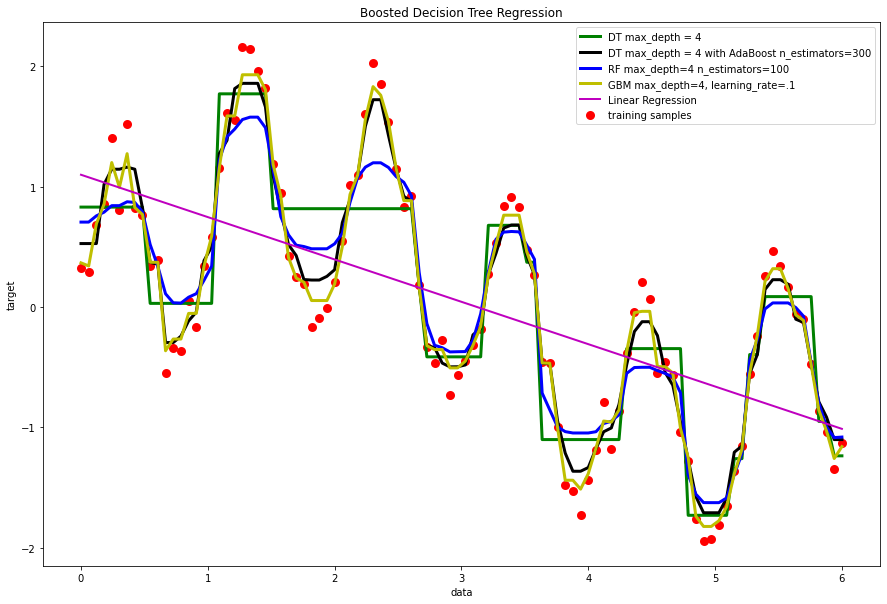

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Create the dataset
rng = np.random.RandomState(1)
noise_strength=0.2
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, noise_strength, X.shape[0])
#y= np.sin(6 * X).ravel()  + X.ravel() + rng.normal(0, noise_strength, X.shape[0])
#y= np.sin(6 * X).ravel() + rng.normal(0, noise_strength, X.shape[0])

#Regression Models
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=100, random_state=rng) 

#An AdaBoost [1] regressor is a meta-estimator that begins by fitting a regressor on the original dataset 
#and then fits additional copies of the regressor on the same dataset but where the weights of instances 
#are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

regr_3 = RandomForestRegressor(max_depth=4, n_estimators=100)
regr_4 = GradientBoostingRegressor(max_depth=3, learning_rate=.1)
regr_5 = KNeighborsRegressor(n_neighbors=4)
regr_6 = LinearRegression()

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)
regr_5.fit(X, y)
regr_6.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)
y_4 = regr_4.predict(X)
y_5 = regr_5.predict(X)
y_6 = regr_6.predict(X)

# Plot the results
plt.figure()
fig = plt.figure(figsize=(15, 10))
plt.scatter(X, y, c="r", label="training samples",linewidth=3)
plt.plot(X, y_1, c="g", label="DT max_depth = 4", linewidth=3)
plt.plot(X, y_2, c="k", label="DT max_depth = 4 with AdaBoost n_estimators=300", linewidth=3)
plt.plot(X, y_3, c="b", label="RF max_depth=4 n_estimators=100", linewidth=3)
plt.plot(X, y_4, c="y", label="GBM max_depth=4, learning_rate=.1", linewidth=3)
#plt.plot(X, y_5, c="m", label="kNN n_neighbors=4", linewidth=2)
plt.plot(X, y_6, c="m", label="Linear Regression", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# What happens if the system is given a value that it has not encountered before (extrapolation)? 

Answer: Most regression algorithms will fail, you need an **anchor** to move the system forward.

<Figure size 432x288 with 0 Axes>

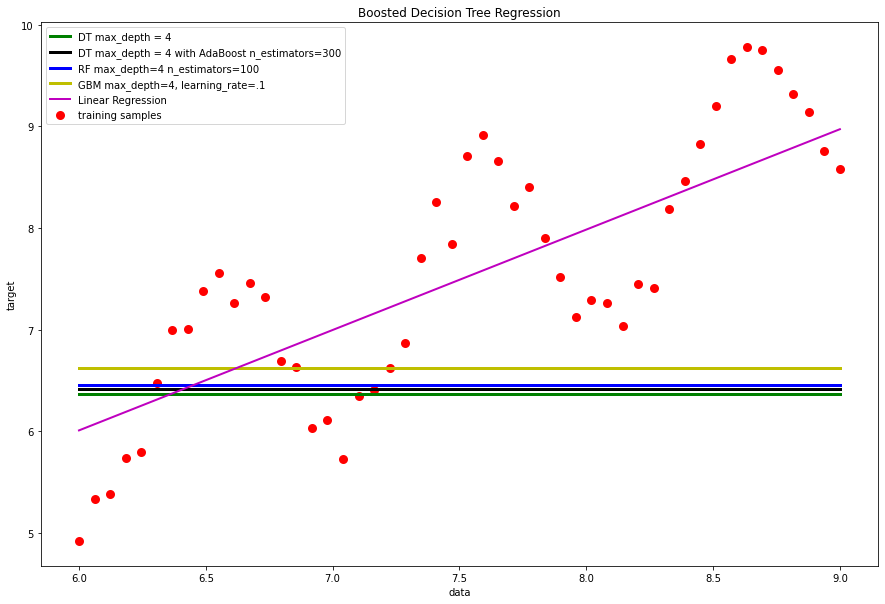

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Create the dataset
rng = np.random.RandomState(1)
noise_strength=0.2
X = np.linspace(0, 5.5, 100)[:, np.newaxis]
#y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, noise_strength, X.shape[0])
y= np.sin(6 * X).ravel()  + X.ravel() + rng.normal(0, noise_strength, X.shape[0])
#y= np.sin(6 * X).ravel() + rng.normal(0, noise_strength, X.shape[0])

X_test= np.linspace(6, 9, 50)[:, np.newaxis]
y_test= np.sin(6 * X_test).ravel()  + X_test.ravel() + rng.normal(0, noise_strength, X_test.shape[0])
#y_test= np.sin(6 * X_test).ravel() + rng.normal(0, noise_strength, X_test.shape[0])

#Regression Models

regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=100, random_state=rng)
regr_3 = RandomForestRegressor(max_depth=4, n_estimators=100)
regr_4 = GradientBoostingRegressor(max_depth=4, learning_rate=.1)
regr_5 = KNeighborsRegressor(n_neighbors=4)
regr_6 = LinearRegression()

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)
regr_5.fit(X, y)
regr_6.fit(X, y)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)
y_5 = regr_5.predict(X_test)
y_6 = regr_6.predict(X_test)

# Plot the results
plt.figure()
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_test, y_test, c="r", label="training samples",linewidth=3)
plt.plot(X_test, y_1, c="g", label="DT max_depth = 4", linewidth=3)
plt.plot(X_test, y_2, c="k", label="DT max_depth = 4 with AdaBoost n_estimators=300", linewidth=3)
plt.plot(X_test, y_3, c="b", label="RF max_depth=4 n_estimators=100", linewidth=3)
plt.plot(X_test, y_4, c="y", label="GBM max_depth=4, learning_rate=.1", linewidth=3)
#plt.plot(X, y_5, c="m", label="kNN n_neighbors=4", linewidth=2)
plt.plot(X_test, y_6, c="m", label="Linear Regression", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# Home Exercise (not to be submitted but discussed with learning team)

Modify the above program and create a meaningful forecaster for the three illustrated test cases in example 2.

Note that in almost all cases, GBM regressor is more superior (visually at least) that all the other tree methods.

### See in the Supplementary Solution to: Bike Sharing, predicting bike rental

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


Attribute Information:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- count: count of total rental bikes including both casual and registered

The dataset was sourced from Hadi Fanaee of Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto , INESC Porto, Campus da FEUP, Rua Dr. Roberto Frias, 378, 4200 - 465 Porto, Portugal.  

Original Source: http://capitalbikeshare.com/system-data 
Weather Information: http://www.freemeteo.com 
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule
